In [27]:
# This cell will be updated with respect to needs of project
using Pkg; for p in ("Knet","AutoGrad","Plots","Images","ImageMagick","ArgParse","CUDA"); haskey(Pkg.installed(),p) || Pkg.add(p); end
using Knet
using Random
using Test
import Base: length, size, iterate, eltype, IteratorSize, IteratorEltype, haslength, @propagate_inbounds, repeat, rand, tail
import .Iterators: cycle, Cycle, take

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\Pkg.jl:554
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\Pkg.jl:554
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\Pkg.jl:554
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\Pkg.jl:554
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\Pkg.jl:554
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\Pkg.jl:554
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\Pkg.jl:554


Vocab

Vocab(Dict("adviser" => 1750,"enjoy" => 4607,"advertisements" => 7826,"fight" => 1441,"nicholas" => 3783,"everywhere" => 6278,"surveyed" => 3556,"helping" => 2081,"whose" => 621,"manufacture" => 5052…), ["<s>", "<unk>", "the", "N", "of", "to", "a", "in", "and", "'s"  …  "cluett", "hydro-quebec", "memotec", "photography", "ipo", "ssangyong", "fromstein", "ferc", "gitano", "daewoo"], 2, 1, split)

In [36]:
length(train_vocab.i2w)

10000

In [17]:
# Text Readers
train_sentences, valid_sentences, test_sentences =
    (TextReader("$datadir/$file.txt", train_vocab) for file in ("train","valid","test"))

Base.Generator{Tuple{String,String,String},var"#13#14"}(var"#13#14"(), ("train", "valid", "test"))

In [13]:
# must refer 542
s

In [31]:
# Iters


64×21 Array{Int64,2}:
  771   400     5   737    83   886    10  …  3031     1    1     1     1  1
   68     3   333    14     8     7     2        1     1    1     1     1  1
 3187    27  2394    12     7  3534     5        1     1    1     1     1  1
    2    78  7439     6     2    22    71        1     1    1     1     1  1
   19     3   236     5     3   273     2        1     1    1     1     1  1
   19     2  2168  4609   545     3     2  …   409  1504  311     1     1  1
   17     3   112  1016    20   638    20       16    55  525  1016  1276  1
  248   279    80    26   920  6766    52        1     1    1     1     1  1
 6268    80    33  5115    52   409    61       61    39   51     1     1  1
  400     2    77     5  5564     5  4743      113   620    6   426   789  1
   91     5     3    61   400   844   545  …     1     1    1     1     1  1
  279    16    91     5    52   139  1261        1     1    1     1     1  1
  125    32   332  1200    18     3   130     2139  41

In [37]:
B,T,E,V = 64,21,512,10000

(64, 21, 512, 10000)

In [50]:
#Linear
struct Linear
    w
    b
end

function Linear(inputsize::Int, outputsize::Int)
    Linear(param(outputsize, inputsize), param0(outputsize))
end

function (l::Linear)(x)
    l.w * mat(x, dims = 1) .+ l.b
end

# Mask!
function mask!(a, pad)
    matr = a
    for j = 1:size(matr)[1]
        i = 0
        while (i < length(matr[j, :]) - 1)
            if matr[j, length(matr[j, :])-i-1] != pad
                break

            elseif matr[j, length(matr[j, :])-i] == pad
                matr[j, length(matr[j, :])-i] = 0
            end
            i += 1
        end
    end
    matr
end

mask! (generic function with 1 method)

In [52]:
#Embed
struct Embed
    w
end

function Embed(vocabsize::Int, embedsize::Int)
    Embed(param(embedsize, vocabsize))
end

# Attention here: Format has been changed for now
function (l::Embed)(x)
    l.w[:, x] # Format has been changed to T,E,B
end

In [53]:
emb = Embed(V,E)
@time q = emb(tst_inst)

  0.004200 seconds (1.30 k allocations: 89.969 KiB)


512×64×21 KnetArray{Float32,3}:
[:, :, 1] =
  0.0199282   -0.0171832     0.0224332   …  -0.000319522   0.0112202
 -0.00343072  -0.000590812  -0.0181531      -0.0180947    -0.00183304
 -0.0149647    0.0104254    -0.00553576      0.011508     -0.004317
  0.0194361    0.00421577   -0.0088441      -0.0101454     0.00162516
 -0.00819135  -0.0185066    -0.0159121      -0.0228895     0.0131603
  0.0023064   -0.0127011    -0.0134652   …   0.00375353    0.0146729
  0.00451766  -0.0087843    -0.0207024       0.0194069     0.00257652
 -0.0200098    0.0105619    -0.0217053      -0.00769338   -0.0170629
 -0.0066553    0.00953789    0.0219039      -0.00398575    0.017724
 -0.0156316    0.0130873     0.0186937      -0.00614243   -0.00866471
  0.0216567    0.0155919    -0.00645063  …   0.00718962    0.00309524
 -0.00496917   0.00846041    0.0152511      -0.0100179     0.00248902
  0.0135022   -0.0138407     0.0158806       0.0143733    -0.00556185
  ⋮                                      ⋱            

In [55]:
ln = Linear(T,E)
ln(q)

LoadError: DimensionMismatch("((512, 21), (512, 1344), (512, 1344))")

In [74]:
function positional_embedding(inp_length,dims)
    PE = zeros(dims,inp_length)

    pos = collect(0:inp_length-1) 
    
    for i in 1:Int(dims/2)
        core = pos/10^(5(2i-2)/dims)
        PE[2i-1,:],PE[2i,:] = sin.(core),cos.(core)
    end
    
    PE
end   

positional_embedding (generic function with 1 method)

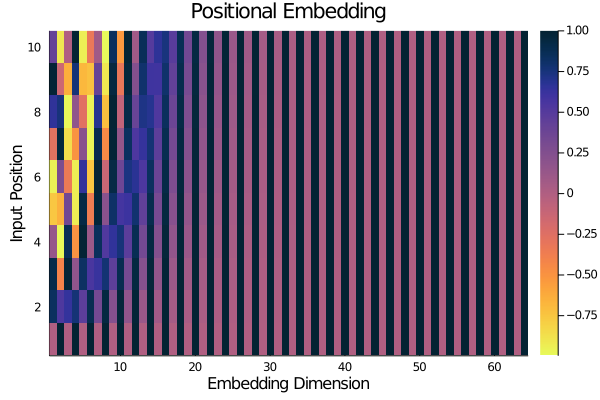

In [80]:
using Plots; default(fmt=:png,ls=:auto)
PE = positional_embedding(10,64)
heatmap(1:64, 1:10, transpose(PE), c = cgrad(:thermal, rev = true), xlabel="Embedding Dimension", ylabel="Input Position",
    title="Positional Embedding")

In [201]:
import Statistics: mean,std

In [204]:
?std

search: std stdin stdout stderr setdiff setdiff! @test_deprecated stride strides



```
std(itr; corrected::Bool=true, mean=nothing[, dims])
```

Compute the sample standard deviation of collection `itr`.

The algorithm returns an estimator of the generative distribution's standard deviation under the assumption that each entry of `itr` is an IID drawn from that generative distribution. For arrays, this computation is equivalent to calculating `sqrt(sum((itr .- mean(itr)).^2) / (length(itr) - 1))`. If `corrected` is `true`, then the sum is scaled with `n-1`, whereas the sum is scaled with `n` if `corrected` is `false` with `n` the number of elements in `itr`.

If `itr` is an `AbstractArray`, `dims` can be provided to compute the standard deviation over dimensions, and `means` may contain means for each dimension of `itr`.

A pre-computed `mean` may be provided. When `dims` is specified, `mean` must be an array with the same shape as `mean(itr, dims=dims)` (additional trailing singleton dimensions are allowed).

!!! note
    If array contains `NaN` or [`missing`](@ref) values, the result is also `NaN` or `missing` (`missing` takes precedence if array contains both). Use the [`skipmissing`](@ref) function to omit `missing` entries and compute the standard deviation of non-missing values.


---

```
std(x::AbstractArray, w::AbstractWeights, [dim]; mean=nothing, corrected=false)
```

Compute the standard deviation of a real-valued array `x`, optionally over a dimension `dim`. Observations in `x` are weighted using weight vector `w`. The uncorrected (when `corrected=false`) sample standard deviation is defined as:

$$
\sqrt{\frac{1}{\sum{w}} \sum_{i=1}^n {w_i\left({x_i - μ}\right)^2 }}
$$

where $n$ is the length of the input and $μ$ is the mean. The unbiased estimate (when `corrected=true`) of the population standard deviation is computed by replacing $\frac{1}{\sum{w}}$ with a factor dependent on the type of weights used:

  * `AnalyticWeights`: $\frac{1}{\sum w - \sum {w^2} / \sum w}$
  * `FrequencyWeights`: $\frac{1}{\sum{w} - 1}$
  * `ProbabilityWeights`: $\frac{n}{(n - 1) \sum w}$ where $n$ equals `count(!iszero, w)`
  * `Weights`: `ArgumentError` (bias correction not supported)


In [247]:
struct LayerNorm
    γ
    β
end
function LayerNorm(layer_length::Int, layer_dim::Int)
    LayerNorm(rand(layer_length, layer_dim), zeros(layer_dim))
end

function (ln::LayerNorm)(x)
    ln.γ * mat(normalize(x), dims = 1) .+ ln.β
end

function normalize(x; dim::Int = 1)
    μ = mean(x,dims=dim) # Consider that the size of x is T,E,B -> must get mean over the dim T
    σ = std(x,mean=μ,dims=dim)
    (x.-μ)./σ
end
    

normalize (generic function with 2 methods)

In [249]:
T,E,B = 6,10,3
A = rand(T,E,B,4)
ln = LayerNorm(T,E)
N = ln(A)

LoadError: DimensionMismatch("A has dimensions (6,10) but B has dimensions (6,120)")

In [222]:
A = rand(5,4,2)

5×4×2 Array{Float64,3}:
[:, :, 1] =
 0.168304  0.233563  0.651229  0.437155
 0.810071  0.863391  0.939922  0.438852
 0.218141  0.679536  0.200636  0.192633
 0.311422  0.362717  0.259577  0.918964
 0.828296  0.92718   0.937675  0.13525

[:, :, 2] =
 0.81053   0.960284  0.885215   0.915812
 0.602327  0.518742  0.773134   0.297471
 0.971545  0.540126  0.0436613  0.40047
 0.433485  0.173787  0.211132   0.277434
 0.185641  0.889102  0.956272   0.683543

In [223]:
m = mean(A,dims=1)
st = std(A,mean=m,dims=1)

1×4×2 Array{Float64,3}:
[:, :, 1] =
 0.325418  0.305141  0.356213  0.309147

[:, :, 2] =
 0.308947  0.317759  0.417005  0.276555

In [224]:
m

1×4×2 Array{Float64,3}:
[:, :, 1] =
 0.467247  0.613277  0.597808  0.424571

[:, :, 2] =
 0.600706  0.616408  0.573883  0.514946

In [225]:
A.-m

5×4×2 Array{Float64,3}:
[:, :, 1] =
 -0.298943  -0.379715    0.053421   0.0125843
  0.342824   0.250113    0.342114   0.0142811
 -0.249106   0.0662586  -0.397172  -0.231938
 -0.155825  -0.25056    -0.33823    0.494393
  0.361049   0.313903    0.339867  -0.289321

[:, :, 2] =
  0.209824     0.343876    0.311332   0.400866
  0.00162147  -0.0976662   0.199252  -0.217475
  0.370839    -0.0762827  -0.530222  -0.114476
 -0.167221    -0.442621   -0.362751  -0.237512
 -0.415065     0.272694    0.382389   0.168597

In [231]:
Q = normalize(A)

5×4×2 Array{Float64,3}:
[:, :, 1] =
 -0.918642  -1.24439    0.149969   0.0407065
  1.05349    0.819663   0.960419   0.0461952
 -0.765496   0.217141  -1.11498   -0.75025
 -0.478846  -0.821127  -0.949517   1.59921
  1.10949    1.02871    0.954113  -0.935867

[:, :, 2] =
  0.67916      1.08219    0.74659    1.4495
  0.00524837  -0.307359   0.477816  -0.786372
  1.20034     -0.240064  -1.2715    -0.413937
 -0.54126     -1.39294   -0.869896  -0.858823
 -1.34348      0.858179   0.916989   0.609634

In [239]:
isNormal(x) = isapprox(x,normalize(x))

isNormal (generic function with 1 method)

In [240]:
isNormal(Q)

true

In [233]:
normalize(Q)

5×4×2 Array{Float64,3}:
[:, :, 1] =
 -0.918642  -1.24439    0.149969   0.0407065
  1.05349    0.819663   0.960419   0.0461952
 -0.765496   0.217141  -1.11498   -0.75025
 -0.478846  -0.821127  -0.949517   1.59921
  1.10949    1.02871    0.954113  -0.935867

[:, :, 2] =
  0.67916      1.08219    0.74659    1.4495
  0.00524837  -0.307359   0.477816  -0.786372
  1.20034     -0.240064  -1.2715    -0.413937
 -0.54126     -1.39294   -0.869896  -0.858823
 -1.34348      0.858179   0.916989   0.609634

In [26]:
?mat

search: match Matrix MathConstants BitMatrix eachmatch LMData VecOrMat @fastmath

Couldn't find mat
Perhaps you meant map, max, cat, match, map!, mark, fma, imag, min, mod or mv


No documentation found.

Binding `mat` does not exist.
